In [1]:
%%capture
%run ./2_clean_column_hauteur.ipynb

## Mark Missing Values

A value of zero does not make sense for the height of a tree and indicates an invalid or missing value

In [2]:
# count the number of values equal to 0 for each column
num_missing = (df[['hauteur_m', 'circonference_cm']] == 0).sum()
# report the results
print(num_missing)

hauteur_m           0
circonference_cm    0
dtype: int64


marking missing values with nan values

In [3]:
# replace '0' values with 'nan'
df[['hauteur_m','circonference_cm']] = df[['hauteur_m','circonference_cm']].replace(0, np.nan)

Also a tree circumference greater than 8 meters doesn't exist in Paris see the link below: [Records circonference des arbres a Paris](https://www.monumentaltrees.com/fr/recordsdecirconference/fra/paris/)

In [4]:
# count the number of values greather than 800
len(df[df['circonference_cm'] >= 800])

74

In [5]:
# replace values greather than 800cm with 'nan'
df.loc[df.circonference_cm >= 800, 'circonference_cm'] = np.nan

In [6]:
df['circonference_cm'].isnull().sum()

11831

### Fill missing values with Mean of Group

We can fill the missing values using fillna and groupby.

In [7]:
df['circonference_cm'].fillna(df.groupby('genre')['circonference_cm'].transform('mean'), inplace = True)

## Outlier Identification and Replacement

### Identify outliers with boxplot

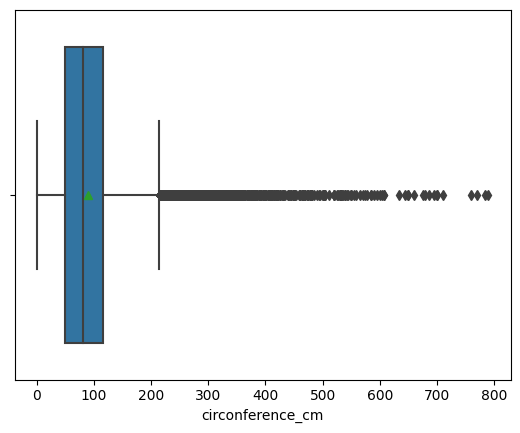

In [8]:
sns.boxplot(x=df['circonference_cm'], showmeans=True);

### Identify outliers with Standard Deviation Method

In [9]:
# calculate summary statistics
data_mean, data_std = np.mean(df.circonference_cm), np.std(df.circonference_cm)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(data_mean, data_std, lower, upper)

89.08666234328071 56.22193366513786 -79.57913865213287 257.75246333869427


In [10]:
# identify outliers
outliers = [x for x in df.circonference_cm if x < lower or x > upper]
min(outliers)
# max(outliers)

258.0

### Identify outliers with Interquartile Range Method

In [11]:
from numpy import percentile
# calculate interquartile range
data = df.circonference_cm[df.circonference_cm.notnull()]
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=49.000, 75th=115.000, IQR=66.000


In [12]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
outliers.sort()
min(outliers)

Identified outliers: 5678


215.0

### Replacing Outliers with upper bound Value

In [13]:
df['circonference_cm'] = np.where(df['circonference_cm'] > upper, upper, df['circonference_cm'])

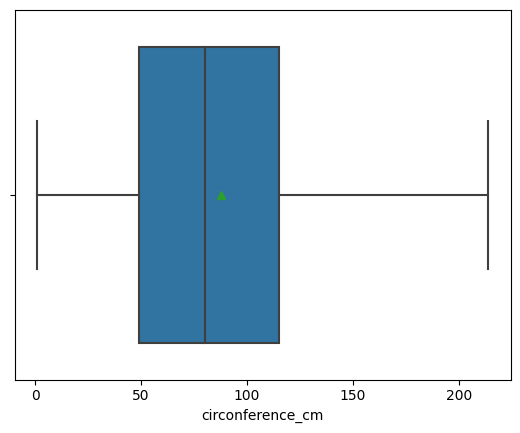

In [14]:
sns.boxplot(x=df['circonference_cm'], showmeans=True);

In [15]:
len(df[df.circonference_cm.isnull()])

5

### Drop rows that has NaN values on hauteur_m columns

In [16]:
df=df.dropna(subset=['circonference_cm'])

In [17]:
len(df[df.circonference_cm.isnull()])

0